# Examples of H-K Stacking of Receiver Functions

This notebook demonstrates the H-K Stacking analysis of receiver functions and the visualisation of the results based on [rfsed](https://github.com/akinremisa/rfsed) package


The required functions are first imported

In [1]:
import os 
import numpy as np
from rfsed.hkZhu import hk, plothk
from rfsed.util import rfMoho_example, rfSed_example, save_plot

The station and the directory to save the output are defined. 

In [2]:
staname='OPLO'
savedir=save_plot()
savepath = savedir + '/HK_Stacking_Zhu/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)
#----------------------------------------------------------

## Example of H-K Stacking for Crustal Layer

For H-K Stacking for crustal thickness (Moho depth), low frequency receiver functions are used.

H-K Stacking weighting and the grid search (the Depth (H) and Vp/Vs (K)) parameters are set

In this example, the data used is from Station OPLO (Network: NL) in the Netherlands. It is located on thick sedimentary layers. The sediment effects observed include an apparent shift in the first peak due to arrivals from the sediment-basement interface. Also, some amplitude interference is observed in the Moho conversion signal due to the arrivals of the sediment reverberation phases. Hence, the effects of the sediment on the receiver function leads to poor estimation of the crustal thickness and Vp/Vs while using the One-Crustal layer H-K Stacking method.

In [3]:
w1, w2, w3 = [0.4, 0.3, 0.3]
K= np.linspace(1.65,1.95,121)
H=np.linspace(20,60,201)

The receiver function data is read and  data parameters like preonset (time before direct P-wave in the data) and Vp of the crust are defined

In [4]:
rfst = rfMoho_example()
rfstreams = rfst.select(component='R', station=staname)
preonset=10
Vp=6.9

The H-K stacking is done and the results are visualised for the case of Moho structure using low frequency receiver functions

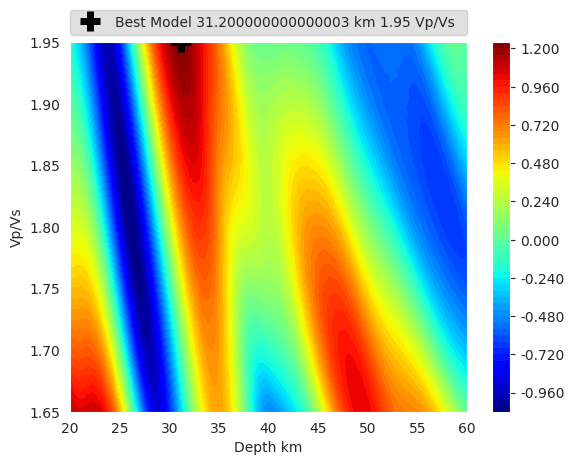

Best depth:  31.200000000000003 Best Vp/Vs: 1.95 Max stack:  1.2390881961805709


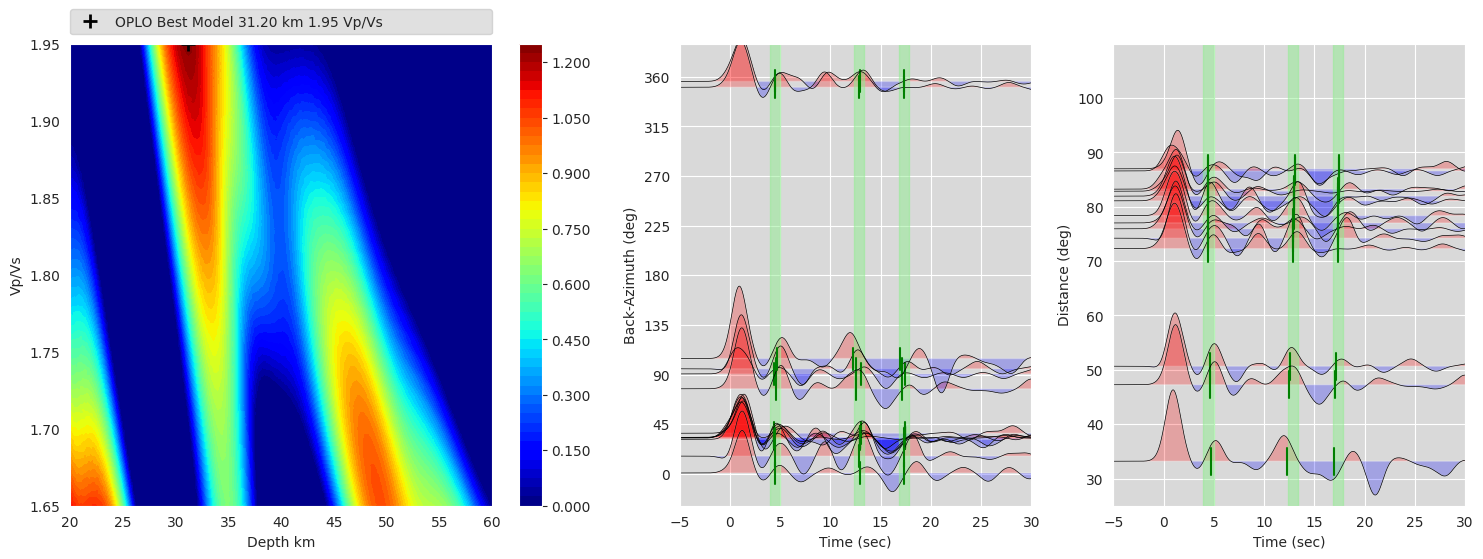

In [5]:
Result=hk(rfstreams, preonset, layer='Moho', stack=False, w1 = w1, w2 = w2, w3 = w3, K= K, H=H, Vp = Vp)
plothk(HKResult=Result, g = [75.,10., 15., 2.5], rmneg = None, savepath=savepath, format = 'jpg')

## Example of H-K Stacking for Sediment Layer

For H-K Stacking for sediment layer, high frequency receiver functions are used.

H-K Stacking weighting and the grid search (the Depth (H) and Vp/Vs (K)) parameters are set

In [6]:
w1, w2, w3 = [0.3, 0.4, 0.3]
K= np.linspace(1.65,2.25,201)
H=np.linspace(0,10,201)

The receiver function data is read and  data parameters like preonset (time before direct P-wave in the data) and Vp of the crust are defined

In [7]:
rfst = rfSed_example()
rfstreams = rfst.select(component='R', station=staname)
preonset=10
Vp=3.3

The H-K stacking is done and the results are visualised for the case of Moho structure using high frequency receiver functions

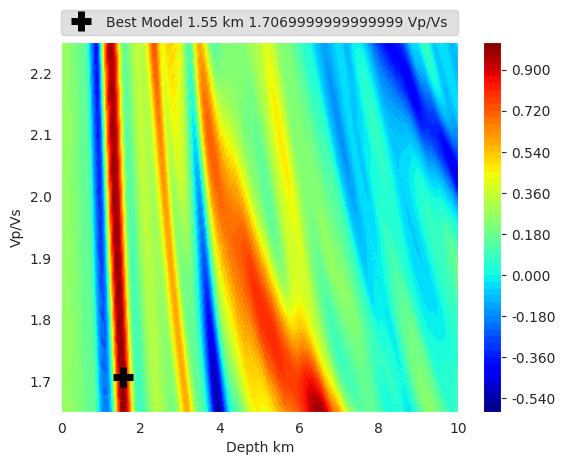

Best depth:  1.55 Best Vp/Vs: 1.7069999999999999 Max stack:  1.0181054400676905


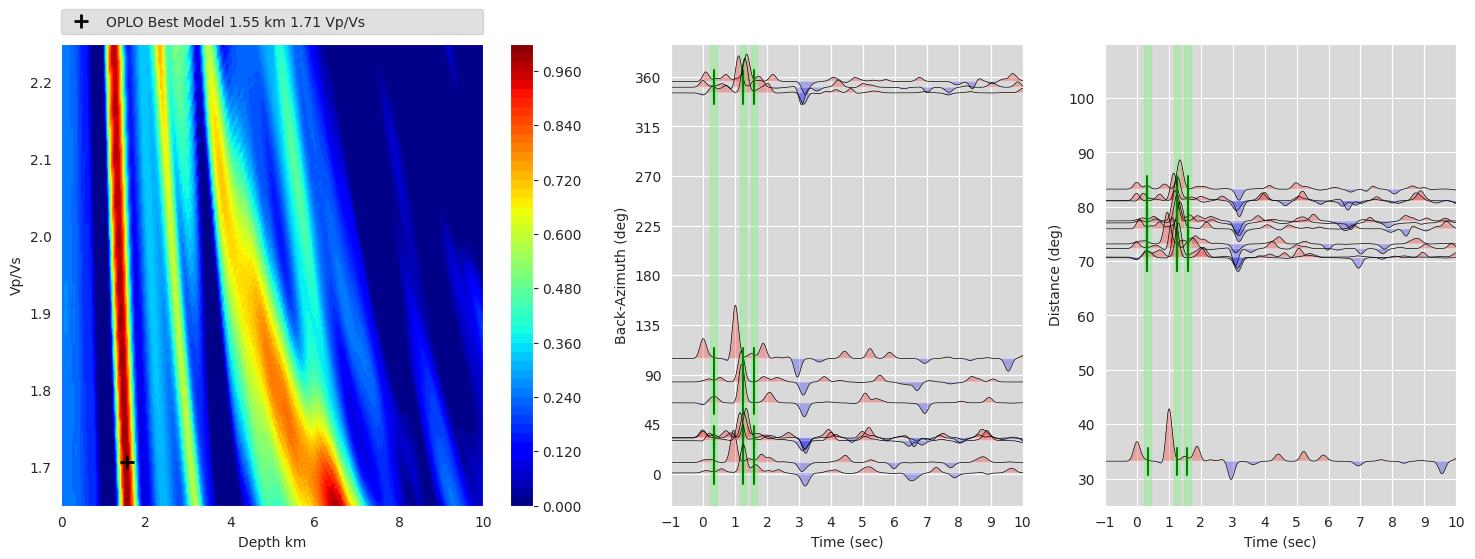

In [8]:
Result=hk(rfstreams, preonset, layer='Sed', stack=False, w1 = w1, w2 = w2, w3 = w3, K= K, H=H, Vp = Vp)
plothk(HKResult=Result, g = [75.,10., 15., 2.5], rmneg = None, savepath=savepath, format = 'jpg')